In [2]:
import os
import numpy as np
import pandas as pd
from MCForecastTools import MCSimulation
from pathlib import Path
%matplotlib inline
import alpaca_trade_api as tradeapi
import requests
from dotenv import load_dotenv
load_dotenv()
import hvplot.pandas

ModuleNotFoundError: No module named 'hvplot'

In [3]:
aapl_path = Path('Data/AAPL_daily_price.csv')
amazon_path = Path('Data/AMZN_daily_price.csv')
dowj_path = Path('Data/DOWJ_daily_price.csv')
fb_path = Path('Data/FB_daily_price.csv')
msft_path = Path('Data/MSFT_daily_price.csv')
nasdaq_path = Path('Data/NASDAQ_daily_price.csv')
nflx_path = Path('Data/NFLX_daily_price.csv')
sp500_path = Path('Data/SP500_daily_price.csv')
tsla_path = Path('Data/TSLA_daily_price.csv')
vix_path = Path('Data/VIX_daily_price.csv')
wmt_path = Path('Data/WMT_daily_price.csv')

In [4]:
AAPL_csv = pd.read_csv(aapl_path, index_col= 'Date',infer_datetime_format = True, parse_dates = True)
AMAZ_csv = pd.read_csv(amazon_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
DOWJ_csv = pd.read_csv(dowj_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
FB_csv = pd.read_csv(fb_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
MSFT_csv = pd.read_csv(msft_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
NASDAQ_csv = pd.read_csv(nasdaq_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
NFLX_csv = pd.read_csv(nflx_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
SP500_csv = pd.read_csv(sp500_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
TSLA_csv = pd.read_csv(tsla_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
VIX_csv = pd.read_csv(vix_path, index_col='Date',infer_datetime_format = True, parse_dates = True)
WMT_csv = pd.read_csv(wmt_path, index_col='Date',infer_datetime_format = True, parse_dates = True)

#rename columns
AAPL_csv = AAPL_csv.rename(columns={'Close':'AAPL'})
AMAZ_csv = AMAZ_csv.rename(columns={'Close':'AMZN'})
DOWJ_csv = DOWJ_csv.rename(columns={'Close':'DOWJ'})
FB_csv = FB_csv.rename(columns={'Close':'FB'})
MSFT_csv = MSFT_csv.rename(columns={'Close':'MSFT'})
NASDAQ_csv = NASDAQ_csv.rename(columns={'Close':'NASDAQ'})
NFLX_csv = NFLX_csv.rename(columns={'Close':'NFLX'})
SP500_csv = SP500_csv.rename(columns={'Close':'S&P500'})
TSLA_csv = TSLA_csv.rename(columns={'Close':'TSLA'})
VIX_csv = VIX_csv.rename(columns={'Close':'VIX'})
WMT_csv = WMT_csv.rename(columns={'Close':'WMT'})

NASDAQ_csv.index = pd.to_datetime(NASDAQ_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
VIX_csv.index = pd.to_datetime(VIX_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
SP500_csv.index = pd.to_datetime(SP500_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
DOWJ_csv.index = pd.to_datetime(DOWJ_csv.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')



In [5]:
stocks = pd.concat([AAPL_csv,AMAZ_csv,FB_csv,MSFT_csv,NFLX_csv,TSLA_csv,WMT_csv], join='inner', axis='columns')
stocks = stocks.drop(columns='Symbol')

stocks.index = pd.to_datetime(stocks.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
stocks.head()

,AAPL,AMZN,FB,MSFT,NFLX,TSLA,WMT
Date,,,,,,,
2015-01-02,27.33,308.52,78.45,46.76,49.85,43.86,85.90
2015-01-05,26.56,302.19,77.19,46.33,47.31,42.02,85.65
2015-01-06,26.57,295.29,76.15,45.65,46.50,42.26,86.31
2015-01-07,26.94,298.42,76.15,46.23,46.74,42.19,88.60
2015-01-08,27.97,300.46,78.18,47.59,47.78,42.12,90.47


In [6]:
indexes = pd.concat([NASDAQ_csv,DOWJ_csv,SP500_csv,VIX_csv],join='inner',axis='columns')
indexes = indexes.drop(columns='Symbol')
indexes.head()


,NASDAQ,DOWJ,S&P500,VIX
Date,,,,
2015-01-02,4726.81,17832.99,2058.20,17.79
2015-01-05,4652.57,17501.65,2020.58,19.92
2015-01-06,4592.74,17371.64,2002.61,21.12
2015-01-07,4650.47,17584.52,2025.90,19.31
2015-01-08,4736.19,17907.87,2062.14,17.01


In [7]:


daily_change_indexes = indexes.pct_change()

##remove all null values#

daily_change_indexes = daily_change_indexes.dropna()
daily_change_indexes.head()


,NASDAQ,DOWJ,S&P500,VIX
Date,,,,
2015-01-05,-0.015706,-0.018580,-0.018278,0.119730
2015-01-06,-0.012860,-0.007428,-0.008893,0.060241
2015-01-07,0.012570,0.012254,0.011630,-0.085701
2015-01-08,0.018433,0.018388,0.017888,-0.119109
2015-01-09,-0.006782,-0.009521,-0.008404,0.031746


In [8]:
daily_change_stocks = stocks.pct_change()
daily_change_stocks = daily_change_stocks.dropna()
daily_change_stocks.head()


,AAPL,AMZN,FB,MSFT,NFLX,TSLA,WMT
Date,,,,,,,
2015-01-05,-0.028174,-0.020517,-0.016061,-0.009196,-0.050953,-0.041952,-0.002910
2015-01-06,0.000377,-0.022833,-0.013473,-0.014677,-0.017121,0.005712,0.007706
2015-01-07,0.013925,0.010600,0.000000,0.012705,0.005161,-0.001656,0.026532
2015-01-08,0.038233,0.006836,0.026658,0.029418,0.022251,-0.001659,0.021106
2015-01-09,0.001073,-0.011749,-0.005628,-0.008405,-0.015488,-0.018756,-0.012380


In [9]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [10]:
today = pd.Timestamp('2015-01-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-30', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AAPL",'AMZN','FB','MSFT','NFLX','TSLA','WMT']

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
tickers_data = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = end_date,
    ).df
tickers_data

MC_keys = {}

for index, value in enumerate(tickers):
    weights=[0, 0, 0, 0, 0, 0, 0]
    weights[index]=1

    num_sims = 500 
    
    MC_5years = MCSimulation(
    portfolio_data=tickers_data,
    
    num_simulation=num_sims,
    num_trading_days=252*5)
    
    MC_5years.calc_cumulative_return()
    MC_keys[value]=MC_5years




Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

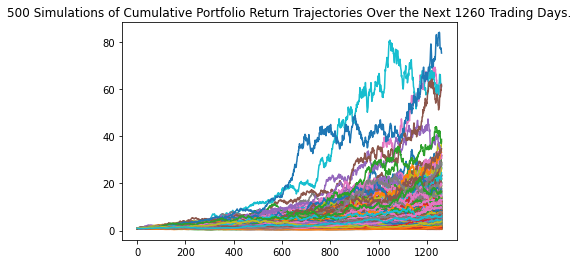

In [46]:
MC_keys['AAPL'].plot_simulation()


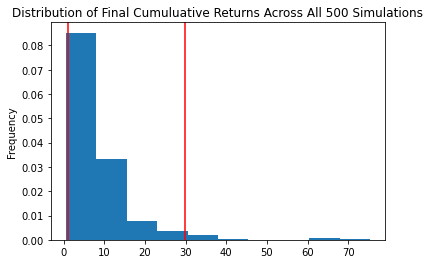

In [47]:
MC_keys['AAPL'].plot_distribution()

In [48]:
tbl_aapl = MC_keys['AAPL'].summarize_cumulative_return()
tbl_aapl

count           500.000000
mean              8.210321
std               8.312105
min               0.520345
25%               3.237893
50%               5.801052
75%              10.047837
max              75.373232
95% CI Lower      1.000470
95% CI Upper     29.860474
Name: 1260, dtype: float64

In [15]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_aapl[8]*10000,2)
ci_upper = round(tbl_aapl[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Apple"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Apple over the next 5 years will end within in the range of $10004.7 and $298604.74


In [56]:
# Compute summary statistics from the simulated daily returns
aapl_simulated_returns_data = {
    "mean": list(MC_keys['AAPL'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['AAPL'].simulated_return.median(axis=1)),
    "min": list(MC_keys['AAPL'].simulated_return.min(axis=1)),
    "max": list(MC_keys['AAPL'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
aapl_df_simulated_returns = pd.DataFrame(aapl_simulated_returns_data)

# Display sample data
aapl_df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000952,1.001041,0.927180,1.067964
2,1.003228,1.005555,0.898522,1.091346
3,1.004812,1.003922,0.887609,1.150459
4,1.006421,1.004685,0.880444,1.145749


In [57]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
aapl_cumulative_pnl = initial_investment * aapl_df_simulated_returns

# Display sample data
aapl_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10009.519659,10010.408437,9271.803642,10679.644603
2,10032.278969,10055.549000,8985.219714,10913.457697
3,10048.124678,10039.221887,8876.086628,11504.591853
4,10064.208809,10046.854883,8804.436018,11457.487299


In [61]:
aapl_cumulative_pnl.to_csv(Path('Data/aapl_cumulative_returns.csv'))

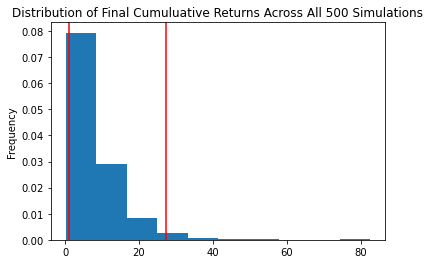

In [16]:
MC_keys['AMZN'].plot_distribution()


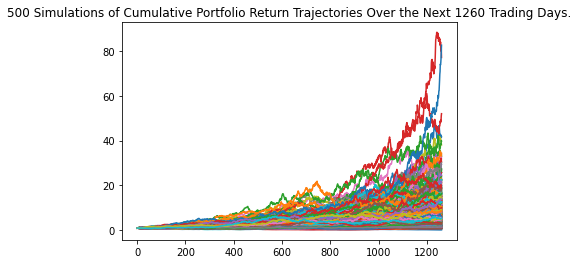

In [17]:
MC_keys['AMZN'].plot_simulation()

In [18]:
tbl_amzn = MC_keys['AMZN'].summarize_cumulative_return()
tbl_amzn

count           500.000000
mean              8.374452
std               8.299284
min               0.197016
25%               3.477907
50%               5.878764
75%              10.694596
max              82.548838
95% CI Lower      1.047799
95% CI Upper     27.319383
Name: 1260, dtype: float64

In [19]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_amzn[8]*10000,2)
ci_upper = round(tbl_amzn[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Amazon"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Amazon over the next 5 years will end within in the range of $10477.99 and $273193.83


In [63]:
# Compute summary statistics from the simulated daily returns
amzn_simulated_returns_data = {
    "mean": list(MC_keys['AMZN'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['AMZN'].simulated_return.median(axis=1)),
    "min": list(MC_keys['AMZN'].simulated_return.min(axis=1)),
    "max": list(MC_keys['AMZN'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
amzn_df_simulated_returns = pd.DataFrame(amzn_simulated_returns_data)

# Display sample data
amzn_df_simulated_returns.head()

# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
amzn_cumulative_pnl = initial_investment * amzn_df_simulated_returns

# Display sample data
amzn_cumulative_pnl.head()

amzn_cumulative_pnl.to_csv(Path('Data/amzn_cumulative_returns.csv'))

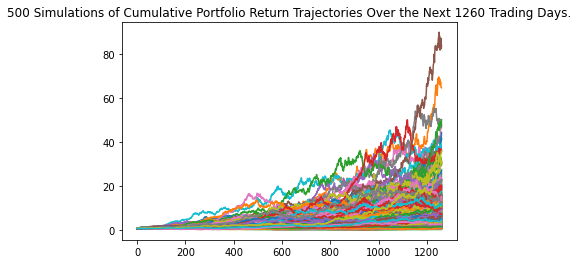

In [20]:
MC_keys['FB'].plot_simulation()

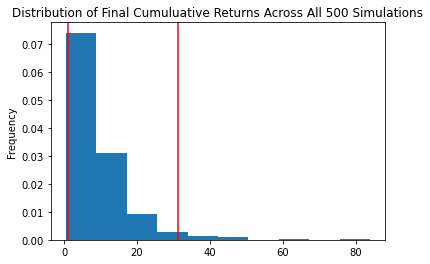

In [21]:
MC_keys['FB'].plot_distribution()

In [22]:
tbl_fb = MC_keys['FB'].summarize_cumulative_return()
tbl_fb

count           500.000000
mean              9.159396
std               8.946638
min               0.454394
25%               3.425588
50%               6.290118
75%              12.332292
max              83.968724
95% CI Lower      1.184836
95% CI Upper     31.115186
Name: 1260, dtype: float64

In [23]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_fb[8]*10000,2)
ci_upper = round(tbl_fb[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Facebook"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Facebook over the next 5 years will end within in the range of $11848.36 and $311151.86


In [64]:
# Compute summary statistics from the simulated daily returns
fb_simulated_returns_data = {
    "mean": list(MC_keys['FB'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['FB'].simulated_return.median(axis=1)),
    "min": list(MC_keys['FB'].simulated_return.min(axis=1)),
    "max": list(MC_keys['FB'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
fb_df_simulated_returns = pd.DataFrame(fb_simulated_returns_data)

# Display sample data
fb_df_simulated_returns.head()


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000891,1.001790,0.934973,1.080747
2,0.999928,0.999989,0.917411,1.119851
3,1.000918,1.000249,0.907408,1.152518
4,1.004304,1.001439,0.876602,1.156657


In [65]:
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
fb_cumulative_pnl = initial_investment * fb_df_simulated_returns

fb_cumulative_pnl.to_csv(Path('Data/fb_cumulative_returns.csv'))

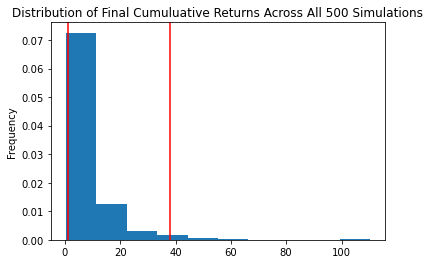

In [24]:
MC_keys['MSFT'].plot_distribution()

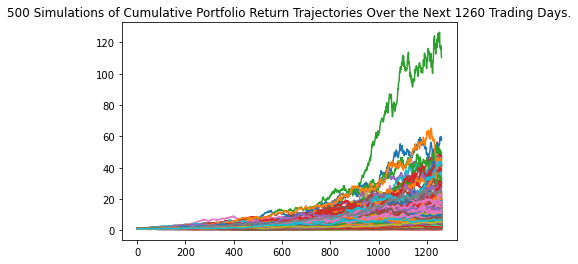

In [25]:
MC_keys['MSFT'].plot_simulation()

In [26]:
tbl_msft = MC_keys['MSFT'].summarize_cumulative_return()
tbl_msft

count           500.000000
mean              8.550627
std               9.560552
min               0.341422
25%               3.314521
50%               5.687290
75%              10.071165
max             110.348222
95% CI Lower      1.125854
95% CI Upper     37.906968
Name: 1260, dtype: float64

In [27]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_msft[8]*10000,2)
ci_upper = round(tbl_msft[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Microsoft"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Microsoft over the next 5 years will end within in the range of $11258.54 and $379069.68


In [66]:
# Compute summary statistics from the simulated daily returns
msft_simulated_returns_data = {
    "mean": list(MC_keys['MSFT'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['MSFT'].simulated_return.median(axis=1)),
    "min": list(MC_keys['MSFT'].simulated_return.min(axis=1)),
    "max": list(MC_keys['MSFT'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
msft_df_simulated_returns = pd.DataFrame(msft_simulated_returns_data)

# Display sample data
msft_df_simulated_returns.head()


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001392,1.001219,0.910930,1.082186
2,1.003682,1.002425,0.902134,1.109885
3,1.005183,1.002740,0.876711,1.143244
4,1.005828,1.004828,0.871092,1.165032


In [67]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
msft_cumulative_pnl = initial_investment * msft_df_simulated_returns

msft_cumulative_pnl.to_csv(Path('Data/msft_cumulative_returns.csv'))

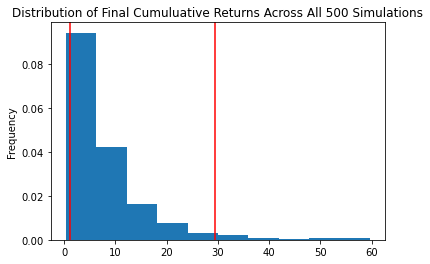

In [28]:
MC_keys['NFLX'].plot_distribution()

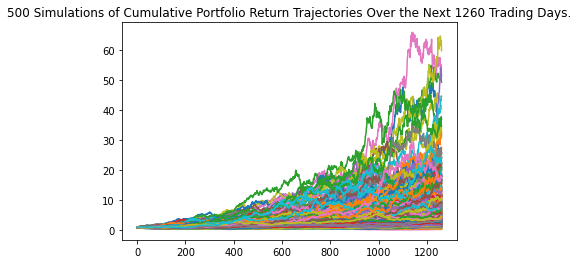

In [29]:
MC_keys['NFLX'].plot_simulation()

In [30]:
tbl_nflx = MC_keys['NFLX'].summarize_cumulative_return()
tbl_nflx

count           500.000000
mean              8.109627
std               7.998184
min               0.332540
25%               3.053841
50%               5.672359
75%              10.855562
max              59.721358
95% CI Lower      1.087309
95% CI Upper     29.349723
Name: 1260, dtype: float64

In [31]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_nflx[8]*10000,2)
ci_upper = round(tbl_nflx[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Netflix"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Netflix over the next 5 years will end within in the range of $10873.09 and $293497.23


In [68]:
# Compute summary statistics from the simulated daily returns
nflx_simulated_returns_data = {
    "mean": list(MC_keys['NFLX'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['NFLX'].simulated_return.median(axis=1)),
    "min": list(MC_keys['NFLX'].simulated_return.min(axis=1)),
    "max": list(MC_keys['NFLX'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
nflx_simulated_returns = pd.DataFrame(nflx_simulated_returns_data)

# Display sample data
nflx_simulated_returns.head()


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000471,1.000048,0.932410,1.067793
2,1.003126,1.002800,0.900655,1.090948
3,1.004471,1.003493,0.899717,1.138000
4,1.004748,1.004197,0.876235,1.172164


In [71]:
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
nflx_cumulative_pnl = initial_investment * nflx_simulated_returns

nflx_cumulative_pnl.to_csv(Path('Data/nflx_cumulative_returns.csv'))

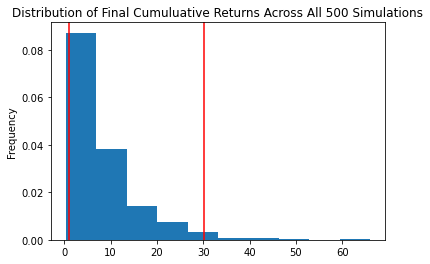

In [32]:
MC_keys['TSLA'].plot_distribution()

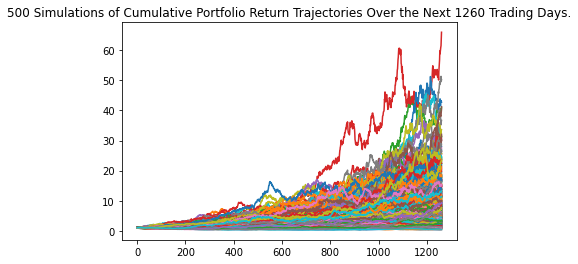

In [33]:
MC_keys['TSLA'].plot_simulation()

In [34]:
tbl_tsla = MC_keys['TSLA'].summarize_cumulative_return()
tbl_tsla

count           500.000000
mean              8.418125
std               7.891185
min               0.355732
25%               3.226486
50%               5.742457
75%              11.026909
max              65.998954
95% CI Lower      1.065262
95% CI Upper     30.115017
Name: 1260, dtype: float64

In [35]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_tsla[8]*10000,2)
ci_upper = round(tbl_tsla[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Tesla"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the Tesla over the next 5 years will end within in the range of $10652.62 and $301150.17


In [72]:
# Compute summary statistics from the simulated daily returns
tsla_simulated_returns_data = {
    "mean": list(MC_keys['TSLA'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['TSLA'].simulated_return.median(axis=1)),
    "min": list(MC_keys['TSLA'].simulated_return.min(axis=1)),
    "max": list(MC_keys['TSLA'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
tsla_simulated_returns = pd.DataFrame(tsla_simulated_returns_data)

# Display sample data
tsla_simulated_returns.head()


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000386,0.999691,0.935571,1.074227
2,1.002128,0.999699,0.920971,1.091000
3,1.004317,1.004271,0.884058,1.138876
4,1.004482,1.002085,0.861798,1.193790


In [74]:
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
tsla_cumulative_pnl = initial_investment * tsla_simulated_returns

tsla_cumulative_pnl.to_csv(Path('Data/tsla_cumulative_returns.csv'))

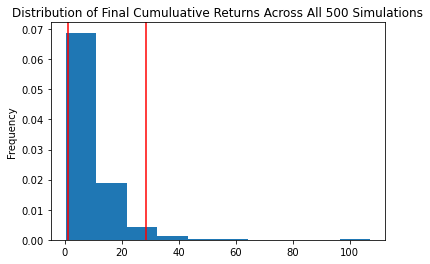

In [36]:
MC_keys['WMT'].plot_distribution()

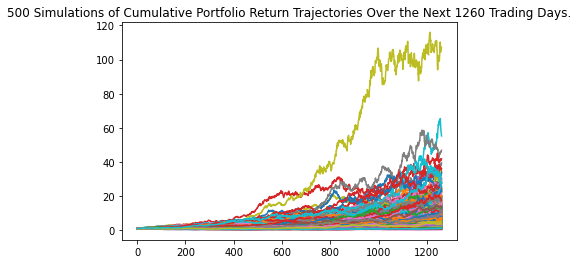

In [37]:
MC_keys['WMT'].plot_simulation()

In [38]:
tbl_wmt = MC_keys['WMT'].summarize_cumulative_return()
tbl_wmt

count           500.000000
mean              8.558729
std               8.610773
min               0.295393
25%               3.166372
50%               6.049969
75%              11.237780
max             107.189069
95% CI Lower      1.049861
95% CI Upper     28.326672
Name: 1260, dtype: float64

In [75]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_wmt[8]*10000,2)
ci_upper = round(tbl_wmt[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the Walmart"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")



There is a 95% chance that an initial investment of $10,000 in the Walmart over the next 5 years will end within in the range of $10498.61 and $283266.72


In [76]:
# Compute summary statistics from the simulated daily returns
wmt_simulated_returns_data = {
    "mean": list(MC_keys['WMT'].simulated_return.mean(axis=1)),
    "median": list(MC_keys['WMT'].simulated_return.median(axis=1)),
    "min": list(MC_keys['WMT'].simulated_return.min(axis=1)),
    "max": list(MC_keys['WMT'].simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
wmt_simulated_returns = pd.DataFrame(wmt_simulated_returns_data)

# Display sample data
wmt_simulated_returns.head()


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000598,0.999863,0.923383,1.076467
2,1.003466,1.004776,0.903121,1.112426
3,1.003120,1.000773,0.883861,1.124537
4,1.004357,1.002325,0.898016,1.137596


In [77]:
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
wmt_cumulative_pnl = initial_investment * wmt_simulated_returns

wmt_cumulative_pnl.to_csv(Path('Data/wmt_cumulative_returns.csv'))

In [84]:
today = pd.Timestamp('2015-01-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-30', tz='America/New_York').isoformat()
# Set the tickers
spy_tickers = ['SPY']

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
spy_tickers_data = api.get_barset(
    spy_tickers,
    timeframe,
    start = today,
    end = end_date,
    ).df
spy_tickers_data





SPY                                       
                             open      high      low    close     volume
2015-01-05 00:00:00-05:00  204.17  204.3700  201.350  201.800  133100354
2015-01-06 00:00:00-05:00  202.09  202.7200  198.855  199.820  166955423
2015-01-07 00:00:00-05:00  201.42  202.7200  200.880  202.340  103285826
2015-01-08 00:00:00-05:00  204.00  206.1600  203.990  205.920  112316394
2015-01-09 00:00:00-05:00  206.40  206.4200  203.510  204.180  124045165
...                           ...       ...      ...      ...        ...
2020-10-26 00:00:00-04:00  342.13  342.9800  335.620  339.415   79491839
2020-10-27 00:00:00-04:00  339.76  340.1200  337.990  338.250   50634843
2020-10-28 00:00:00-04:00  332.10  338.2483  326.130  326.670  107939571
2020-10-29 00:00:00-04:00  326.91  333.3950  325.090  329.990   74362731
2020-10-30 00:00:00-04:00  328.28  329.6900  322.600  326.530   93413096

[1468 rows x 5 columns]

In [86]:

num_sims = 500 
    
SPY_MC_5years = MCSimulation(
    portfolio_data=spy_tickers_data,
    num_simulation=num_sims,
    num_trading_days=252*5)
    
SPY_MC_5years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005177,0.993158,1.009332,1.001961,0.996421,1.009709,0.975084,1.019660,1.008768,0.999204,...,0.997252,0.989721,0.988142,1.001778,1.003812,0.977259,1.007847,1.019197,1.009529,0.988363
2,1.009818,0.985146,1.000653,0.994464,1.002054,1.024291,0.966681,1.017799,1.026190,1.012285,...,0.997134,0.991584,0.980643,0.999314,0.995080,0.966642,1.016579,1.020750,1.016981,0.984182
3,1.003054,0.977737,1.011022,0.991834,1.004918,1.020911,0.983337,1.043633,1.052232,1.001297,...,1.002089,0.993351,0.975719,1.013238,0.985452,0.954413,1.013836,1.010480,1.004562,0.993545
4,0.999986,0.981664,0.994288,0.981754,1.007298,1.007560,0.991417,1.053226,1.054409,1.006708,...,0.990941,1.014472,0.975833,1.000818,0.992944,0.942319,1.013661,1.016093,1.016423,0.995271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.454770,1.382093,1.561245,2.162857,2.176310,1.687848,1.084494,0.903380,1.189712,1.330689,...,0.917284,0.952664,1.651267,1.953272,1.674829,1.665516,0.889055,0.458933,2.537682,1.878520
1257,2.462525,1.366985,1.564625,2.203288,2.219408,1.714219,1.093299,0.900357,1.192649,1.338054,...,0.922719,0.960355,1.635957,1.945689,1.675232,1.668453,0.875468,0.451073,2.500458,1.841713
1258,2.434866,1.357446,1.573941,2.232684,2.256852,1.701787,1.110214,0.904278,1.192820,1.351826,...,0.943936,0.965576,1.609358,1.928045,1.665144,1.696907,0.883277,0.446701,2.566961,1.812359
1259,2.412076,1.343599,1.587572,2.267146,2.226759,1.711539,1.083456,0.897432,1.218250,1.314979,...,0.955194,0.965516,1.595759,1.918584,1.677318,1.690605,0.881290,0.449584,2.544136,1.778171


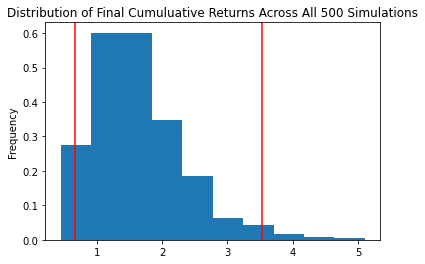

In [87]:
SPY_MC_5years.plot_distribution()

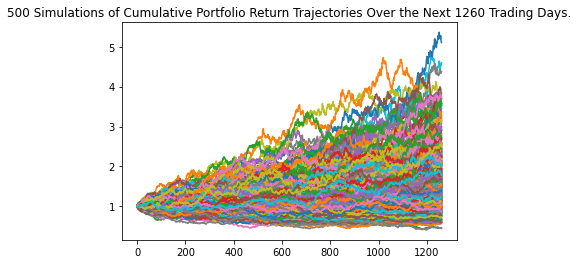

In [88]:
SPY_MC_5years.plot_simulation()

In [96]:
tbl_spy = SPY_MC_5years.summarize_cumulative_return()
tbl_spy

count           500.000000
mean              1.634642
std               0.705603
min               0.448483
25%               1.112938
50%               1.550118
75%               1.985046
max               5.104571
95% CI Lower      0.663683
95% CI Upper      3.528633
Name: 1260, dtype: float64

In [92]:
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_spy[8]*10000,2)
ci_upper = round(tbl_spy[9]*10000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the S&P500"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")



There is a 95% chance that an initial investment of $10,000 in the S&P500 over the next 5 years will end within in the range of $6636.83 and $35286.33


In [93]:
# Compute summary statistics from the simulated daily returns
spy_simulated_returns_data = {
    "mean": list(SPY_MC_5years.simulated_return.mean(axis=1)),
    "median": list(SPY_MC_5years.simulated_return.median(axis=1)),
    "min": list(SPY_MC_5years.simulated_return.min(axis=1)),
    "max": list(SPY_MC_5years.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
spy_simulated_returns = pd.DataFrame(spy_simulated_returns_data)

# Display sample data
spy_simulated_returns.head()


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000090,1.000150,0.966916,1.039702
2,1.000658,1.000384,0.953177,1.049653
3,1.000643,0.999245,0.952382,1.063908
4,1.000702,1.000017,0.936025,1.075907


In [98]:
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
spy_cumulative_pnl = initial_investment * spy_simulated_returns


spy_cumulative_pnl.to_csv(Path('Data/spy_cumulative_returns.csv'))
spy_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10000.900963,10001.499873,9669.158435,10397.017602
2,10006.582274,10003.841393,9531.766341,10496.526992
3,10006.434064,9992.453370,9523.823376,10639.081510
4,10007.023106,10000.169660,9360.250821,10759.074741
